## Training and Testing Set Generation

In [1]:
import pandas as pd
import skimage
import matplotlib.pyplot as plt

In [2]:
# Outliers
img_nr = ['001325', '001405']
size = 64

def inner_loop(image, size, c):
    patches=[]
    for a in range(c[2]-c[0]):
        for b in range(c[3]-c[1]):
            corners = [c[0]+a-size//2, c[1]+b-size//2, c[0]+a+size//2, c[1]+b+size//2]
            if corners[0]>0 and corners[1]>0 and corners[2]<image.shape[0] and corners[3]<image.shape[1]:
                patch = image[corners[0]:corners[2], corners[1]:corners[3]]
                patches.append(patch)
                skimage.io.imsave('Images/Outliers/patch%d.png'%len(patches), patch)
    return patches

In [3]:
def extract_patches(nr):
    img=skimage.io.imread('Images/Original/'+nr+'.png')
    df = pd.read_csv('csv/'+nr+'.csv', skiprows=6)
    coordinates = [df.iloc[0][1],df.iloc[0][0],df.iloc[0][1]+df.iloc[0][3],df.iloc[0][0]+df.iloc[0][2]] 
    return inner_loop(img, size, coordinates)

for i in img_nr:
    patches = extract_patches(i)
    print('number of patches: ', len(patches))

number of patches:  0
number of patches:  285


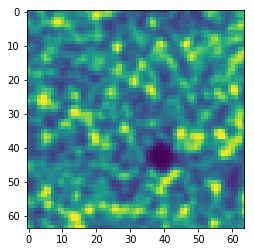

In [4]:
plt.imshow(patches[1])

In [5]:
# Training and Normal
img_nr = ['001264', '001265']
size = 64

def inner_loop(image, nr, size):
    patches=[]
    for a in range(1, image.shape[0]-65, 64):
        for b in range(1, image.shape[1]-65, 64):
            patch = image[a:a+64, b:b+64]
            patches.append(patch)
            if nr=='001264':
                skimage.io.imsave('Images/Training/normal_patch%d.png'%len(patches), patch)
            else:
                skimage.io.imsave('Images/Normal/normal_patch%d.png'%len(patches), patch)
    return patches

In [6]:
def extract_patches(nr):
    img=skimage.io.imread('Images/Original/'+nr+'.png')
    return inner_loop(img, nr, size)

for i in img_nr:
    patches = extract_patches(i)
    print('number of patches: ', len(patches))

number of patches:  77
number of patches:  77
